
# Figure 4

This script contains the analysis for generating plots in Figure 4. of Inge et al. (Dev. Cell, 2025).

This script is proceeded by segmentation and quantification script "para_star.sh" for parallel StarDist nuclear segmentation on HPC cluster.



### Load Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from glob import glob 
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import Figure_4_Plotting_functions as PF

##CH1 mCherry-NLS
##CH2 FOXC1-Achilles
##CH3 Trans

ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]


## Pre-processing:

The following part is for reading in trackmate traces and tracking histories for each final cell.




In [46]:
fns = list(sorted(glob(os.path.join("Figure_4_B-G_FOXC1LiveImaging/Main_dataset/Tracking/*tracks*.csv"))))
dfs = [pd.read_csv(x).iloc[3:] for x in fns]
dfs = [dfs[i].assign(Position=fns[i].split('/').pop()[0:5]) for i in range(len(fns))]

trackmate_data = pd.concat(dfs)

## Trackmate columns to carry over

trackmate_data = trackmate_data[['Position','LABEL', 'ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T','MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']]

trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']] = trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']].astype(float)

trackmate_data = trackmate_data.reset_index()

trackmate_data['branch'] = trackmate_data.LABEL.str.split('.', 1).str[1]
trackmate_data.branch.fillna('root', inplace=True)
## Convert time to hours 
trackmate_data['Time_hours'] = trackmate_data['POSITION_T']*0.25

trackmate_data["Log10_FOXC1_Achilles"] = np.log10(trackmate_data["MEAN_INTENSITY_CH2"])

In [47]:
## Positions and tracks
Positions = ['B4_P1', 'B5_P1', 'B5_P1', 'C5_P1', 
             'C5_P1','C5_P2','C4_P2']
Tracks = [614, 271, 306, 1098, 1122, 
          1060,603]

In [48]:
trackmate_data_manual = list()
for p in zip(Positions, Tracks):
    trackmate_data_manual.append(trackmate_data.loc[(trackmate_data['Position'] == p[0]) & (trackmate_data['TRACK_ID'] == p[1])])
    print(p[0])    
trackmate_data_manual = pd.concat(trackmate_data_manual)

B4_P1
B5_P1
B5_P1
C5_P1
C5_P1
C5_P2
C4_P2


In [49]:

## B4_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B4_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 614), 'fate'] = 'SOX17+FOXC1-Ach+'

## B5_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 271 ) &
                          (trackmate_data_manual['branch'].isin(['bbaba', 'bbabb','bbbaa',"bbbab"])), 'fate'] = 'SOX17-FOXC1+Ach+'


trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 306), 'fate'] = 'SOX17+FOXC1-Ach-'

## C5_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1098) &
                          (trackmate_data_manual['branch'].isin(['baaa', 'baab'])), 'fate'] = 'SOX17+FOXC1-Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1098) &
                          (trackmate_data_manual['branch'].isin(['abab'])), 'fate'] = 'SOX17-FOXC1+Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1122), 'fate'] = 'SOX17+FOXC1-Ach-'

## C5_P2

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P2') & 
                          (trackmate_data_manual['TRACK_ID'] == 1060) &
                          (trackmate_data_manual['branch'].isin(['baaa','baba'])), 'fate'] = 'SOX17+FOXC1-Ach+'



###########################
###########################
####### #NEW DATA  ########
###########################
###########################

#C5_P2
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P2') & 
                          (trackmate_data_manual['TRACK_ID'] == 1060 ) &
                          (trackmate_data_manual['branch'].isin(['babb'])), 'fate'] = 'SOX17+FOXC1+Ach+'

## C4_P2 - 1060
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C4_P2') & 
                          (trackmate_data_manual['TRACK_ID'] == 603 ) &
                          (trackmate_data_manual['branch'].isin(['aaba'])), 'fate'] = 'SOX17+FOXC1+Ach+'

Which_to_track = trackmate_data_manual.loc[trackmate_data_manual['fate'].notna()]
Which_to_track = list(Which_to_track.loc[Which_to_track['POSITION_T']==383.0]['LABEL'].unique())

def find_histories(df, column_name, base_string):
    result_dfs = []
    
    fate_ = df.loc[df['LABEL']==base_string]['fate'].unique()[0]
    for i in range(len(base_string), 0, -1):
        shortened_string = base_string[:i]
        
        filtered_df = df[df[column_name] == shortened_string]
        
        if not filtered_df.empty:
            result_dfs.append(filtered_df)
    
    root_string = base_string.split('.')[0] + '.0'  
    root_df = df[df[column_name] == root_string]  
    if not root_df.empty:
        result_dfs.append(root_df)
        
    results = pd.concat(result_dfs)
    results['Track_History_Name'] = base_string
    results['fate'] = fate_
    return results

tracks_to_trace = Which_to_track
dfs = []
for i in tracks_to_trace:
    df_ = find_histories(trackmate_data_manual, 'LABEL', i)
    dfs.append(df_)

all_tracks = pd.concat(dfs)

## Fate labelling 
## C3_P2 - 524
all_tracks.loc[all_tracks['fate']=='SOX17+FOXC1+Ach+', 'state'] = 'unassigned'
all_tracks.loc[all_tracks['fate']=='SOX17+FOXC1-Ach-', 'state'] = 'Endoderm'
all_tracks.loc[all_tracks['fate']=='SOX17+FOXC1-Ach+', 'state'] = 'Endoderm'
all_tracks.loc[all_tracks['fate']=='SOX17-FOXC1+Ach+', 'state'] = 'Mesoderm'

all_tracks = all_tracks.loc[~(all_tracks['Track_History_Name']=='Track_1060.babb')]

## Figure 4B - FOXC1 single-cell dynamics:

Data was tracked using trackmate and individual histories formed using function found in additional scripts


In [50]:
## Find track ends 
all_tracks = all_tracks.reset_index()
all_tracks['track'] = all_tracks['Track_History_Name'] \
    .str.replace(r'^Track_', '', regex=True) \
    .str.replace('.', '_', regex=False)
all_tracks['markers'] = all_tracks['fate']

## mitosis
track_start = all_tracks.groupby(['LABEL']).min()
track_start = track_start.reset_index()
#End point
track_end = all_tracks.loc[all_tracks['POSITION_T']==383]

Individual histories with end state circles.

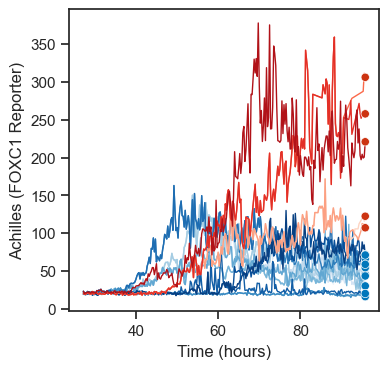

In [51]:
plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")


# Set the custom palette
ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=all_tracks.loc[all_tracks['state']=='Endoderm'],
                          hue='Track_History_Name', zorder=1, alpha=1, linewidth=1, palette="Blues")

# Set the custom palette
ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=all_tracks.loc[all_tracks['state']=='Mesoderm'],
                          hue='Track_History_Name', zorder=1, alpha=1, linewidth=1, palette="Reds")



plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles (FOXC1 Reporter)')

# Define the marker styles for each condition
marker_styles = {'SOX17+FOXC1-Ach+': 'o', 'SOX17-FOXC1+Ach+': 'o', 'SOX17+FOXC1-Ach-': 'o'}


ax = sns.scatterplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
             data=track_end, hue="markers", style="markers", zorder=2, palette=[ingeo_colours[0], ingeo_colours[4], ingeo_colours[0]]
                    , markers=marker_styles)
#plt.grid(zorder=0)  #just add this

ax.get_legend().remove()

Means of different enstate populations

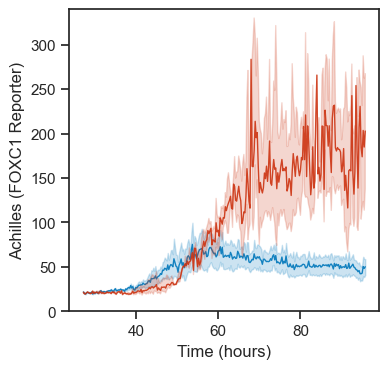

In [52]:
palette = [ingeo_colours[0], ingeo_colours[4]]

plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")

ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=all_tracks,
                          hue='state', zorder=1, alpha=0.9, linewidth=1, palette=palette)

plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles (FOXC1 Reporter)')
#plt.grid(zorder=0)  #just add this
ax.set(ylim=(0,340))

ax.get_legend().remove()

## Figure 4C - Single traces and examples
Montages were made in napari and fiji.  
Single traces were made as shown below.

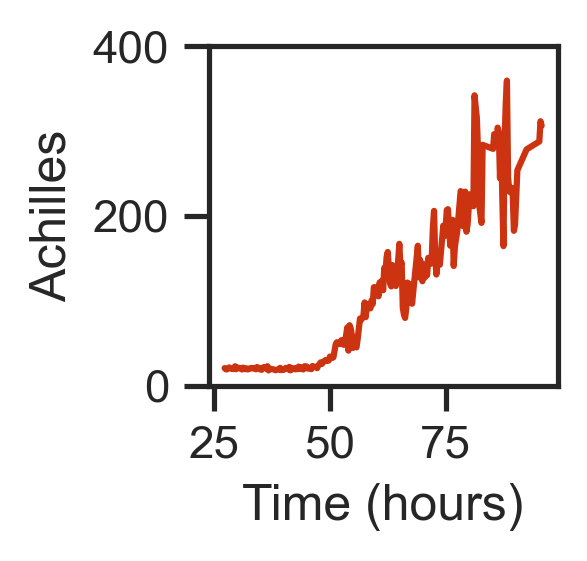

In [55]:
track_selected = '271_bbbab'
track_s = all_tracks.loc[all_tracks['track']==track_selected]

plt.figure(figsize=(1.5,1.5), dpi=300)
sns.set_theme(style="ticks")


# Set the custom palette
ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=track_s,
                          hue='track', zorder=1, alpha=1, linewidth=1.5, palette=[ingeo_colours[4]])


plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles')
plt.ylim(0,400)

ax.get_legend().remove()
#plt.savefig(f"{track_selected}_single_track.pdf")

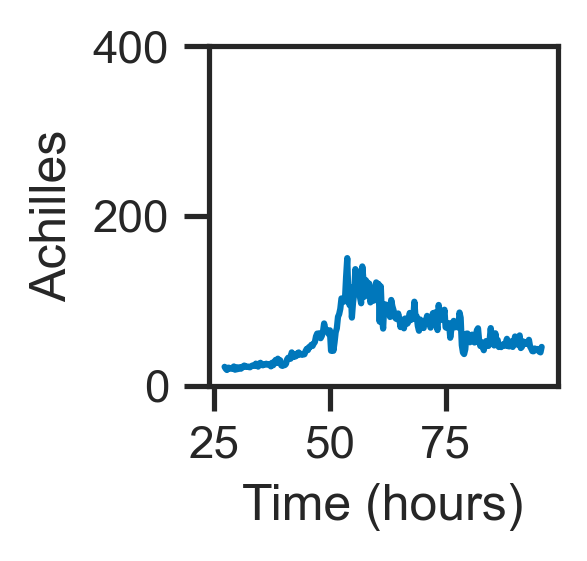

In [56]:
track_selected = '614_aaaa'
track_s = all_tracks.loc[all_tracks['track']==track_selected]

plt.figure(figsize=(1.5,1.5), dpi=300)
sns.set_theme(style="ticks")


# Set the custom palette
ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=track_s,
                          hue='track', zorder=1, alpha=1, linewidth=1.5, palette=[ingeo_colours[0]])


plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles')
plt.ylim(0,400)

ax.get_legend().remove()
#plt.savefig(f"{track_selected}_single_track.pdf")

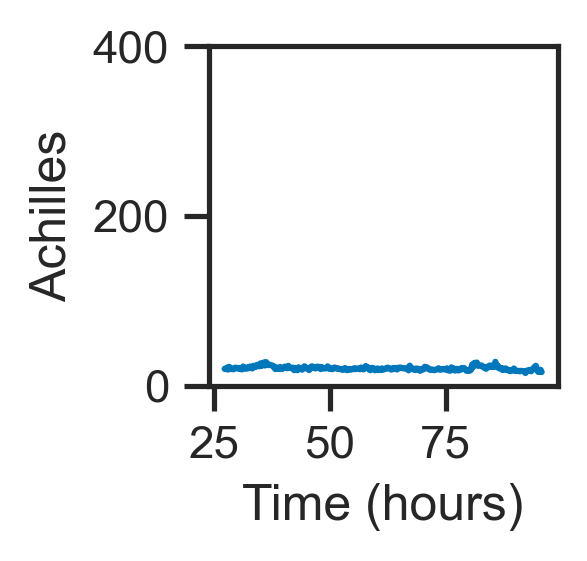

In [57]:
track_selected = '306_abaa'
track_s = all_tracks.loc[all_tracks['track']==track_selected]

plt.figure(figsize=(1.5,1.5), dpi=300)
sns.set_theme(style="ticks")


# Set the custom palette
ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=track_s,
                          hue='track', zorder=1, alpha=1, linewidth=1.5, palette=[ingeo_colours[0]])


plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles')
plt.ylim(0,400)

ax.get_legend().remove()
#plt.savefig(f"{track_selected}_single_track.pdf")

## Figure 4E - Mean dynamics, per route


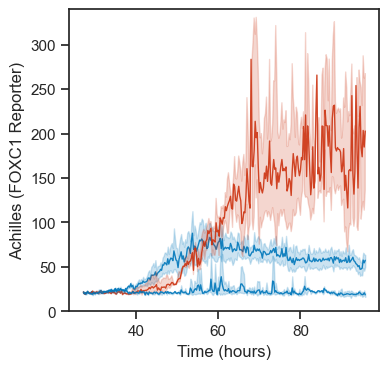

In [58]:
palette = [ingeo_colours[0], ingeo_colours[4], ingeo_colours[0]]

plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")

ax = sns.lineplot(x="Time_hours", y="MEAN_INTENSITY_CH2",
                     data=all_tracks,
                          hue='markers', zorder=1, alpha=0.9, linewidth=1, palette=palette)

plt.xlabel(f'Time (hours)')
plt.ylabel(f'Achilles (FOXC1 Reporter)')
#plt.grid(zorder=0)  #just add this
ax.set(ylim=(0,340))

ax.get_legend().remove()

## Figure 4F - Proportions routes


In [61]:
feature_data = pd.read_csv("Figure_4_B-G_FOXC1LiveImaging/Figure_4F-G_AchPNdata/rescan_003/feature_data_selected_647.csv")

In [66]:
selected = feature_data.loc[feature_data['Condition'].isin(['B2','B3','B4','B5'])]
subsets = selected.loc[selected['area']>200]
cond = 'B4'

AchT = 177
subsets.loc[(subsets['mean_intensity_mCherry']>AchT), 'Achilles_status'] = 'Achilles+'
subsets.loc[(subsets['mean_intensity_mCherry']<AchT), 'Achilles_status'] = 'Achilles-'
subsets.loc[(subsets['mean_intensity_647']>2200), 'SOX17_status'] = 'SOX17+'
subsets.loc[(subsets['mean_intensity_647']<2200), 'SOX17_status'] = 'SOX17-'
SOX17_ = subsets.loc[subsets['SOX17_status']=='SOX17+']
subset = SOX17_

In [70]:
groups = "Condition"

celltypes = subset.groupby(["Condition", 'Achilles_status']).count()
celltypes = pd.DataFrame(celltypes['label']).reset_index().pivot(index=groups, columns='Achilles_status', values='label')
Achilles_status = celltypes.fillna(0)

counts = subset.groupby(["Condition"]).count()

data = [counts["label"],
        Achilles_status["Achilles+"],
        Achilles_status["Achilles-"]

       ]

headers = ["Count", 
           "Achilles+",
           "Achilles-"
          ]

data_pos = pd.concat(data, axis=1, keys=headers)
data_pos = data_pos.reset_index()
data_pos = data_pos.rename(columns={'index': 'Condition'})

data_pos['Condition'] = data_pos['Condition']


data_pos["Achilles+"] = data_pos["Achilles+"]/data_pos["Count"]*100
data_pos["Achilles-"] = data_pos["Achilles-"]/data_pos["Count"]*100


data_pos = pd.melt(data_pos, id_vars='Condition', value_vars=['Achilles+', 'Achilles-'])

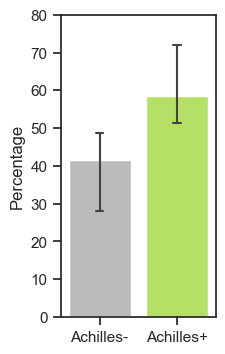

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2,4), dpi=100)
sns.set_theme(style="ticks")

# Assuming your DataFrame is named df
ax = sns.barplot(data=data_pos, x='variable', y='value', hue='variable', order=['Achilles-', 'Achilles+'], 
                capsize=0.1, errwidth=1.5, dodge=False, palette=['#BBF451', ingeo_colours[6]])

plt.xlabel(f'')
plt.ylabel(f'Percentage')
#plt.grid(zorder=0)  #just add this
ax.get_legend().remove()
plt.ylim(0,80)

plt.show()

## Figure 4G - Expression levels routes


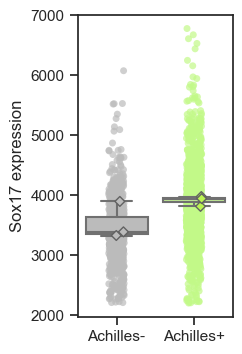

In [83]:
SOX17_ = SOX17_.loc[SOX17_['mean_intensity_647'] < 10000]
grouped = SOX17_.groupby(['Condition','Achilles_status']).mean()
grouped = grouped.reset_index()


plt.figure(figsize=(2,4), dpi=100)
sns.set_theme(style="ticks")

# Assuming your DataFrame is named df
ax = sns.boxplot(data=grouped, x='Achilles_status', y='mean_intensity_647', hue='Achilles_status', order=['Achilles-', 'Achilles+'], zorder=1, dodge=False, palette=['#c2f988',ingeo_colours[6]])
ax = sns.stripplot(data=grouped, marker="D", linewidth=1,  edgecolor="gray", x='Achilles_status', y='mean_intensity_647', hue='Achilles_status', order=['Achilles-', 'Achilles+'], zorder=2, dodge=False, palette=['#BBF451',ingeo_colours[6]])
ax = sns.stripplot(data=SOX17_, x='Achilles_status', y='mean_intensity_647', hue='Achilles_status', order=['Achilles-', 'Achilles+'], zorder=0,  dodge=False, palette=[ingeo_colours[6], '#c2f988'], alpha=0.7)

plt.xlabel(f'')
plt.ylabel(f'Sox17 expression')
ax.get_legend().remove()
#plt.ylim(0,6000)


plt.show()